In [1]:
import numpy as np
from mfpml.optimization.sfbo import SFBO
from mfpml.problems.singlefidelity_functions import Forrester

In [2]:
# define problem
func = Forrester()
problem = func.f

# define single fidelity bayesian optimization
bo = SFBO(problem=problem, design_space=func.design_space)
bo.run_optimizer(num_init=2, num_iter=15, acquisition='LCB',
                 stopping_error=0.01, optimum=func.optimum)

iter:1 =====================================
best_y: -4.304197
best_x: [0.6931833]
error: 0.285105
iter:2 =====================================
best_y: -6.005308
best_x: [0.75183011]
error: 0.002563


(array([-6.00530788]), array([-6.00530788]))

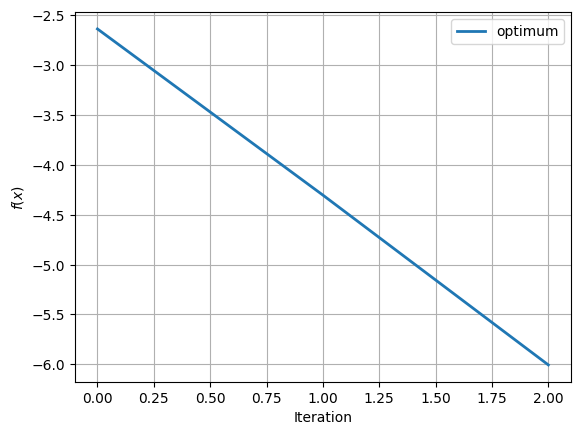

In [3]:
# print(best_y, best_x)
bo.plot_optimization_history()

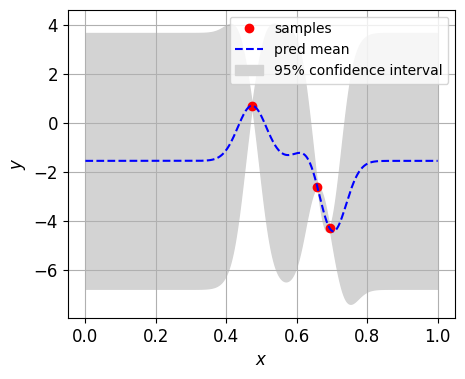

In [5]:
bo.model.plot_prediction(figsize=(5, 4))